In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [2]:
DESIRED_COLUMNS = [
    'Id',
    'Text',
    'Label'
]

In [3]:
df_trac2018 = pd.read_csv('../pynlp/data/trac2018/trainData.csv', delimiter='\t')
df_trac2018.columns = DESIRED_COLUMNS
df_trac2018['Label'] = 'TRAC ' + df_trac2018['Label'] 

In [4]:
df_olid = pd.read_csv('../pynlp/data/OLID-A/trainData.csv', delimiter='\t')
df_olid.columns = DESIRED_COLUMNS
df_olid['Label'] = 'OLID ' + df_olid['Label'] 

In [5]:
df_gibert = pd.read_csv('../pynlp/data/gibert/trainData.csv', delimiter='\t')
df_gibert.columns = DESIRED_COLUMNS
df_gibert['Label'] = 'Gibert ' + df_gibert['Label']

In [6]:
df_vidgen = pd.read_csv('../pynlp/data/vidgen_extra/Dynamically Generated Hate Dataset v0.2.3.csv')
df_vidgen['label'] = df_vidgen['label'].replace({
    'hate': 'hate',
    'nothate': 'noHate'
})
df_vidgen = df_vidgen[df_vidgen['split'] == 'train']
df_vidgen = df_vidgen[['acl.id', 'text', 'label']]
df_vidgen.columns = DESIRED_COLUMNS
df_vidgen['Label'] = 'Vidgen ' + df_vidgen['Label']

In [7]:
df = pd.concat([
    df_trac2018,
    df_olid,
    df_gibert,
    df_vidgen
])

In [8]:
df.groupby('Label')[['Id']].count()

,Id
Label,
Gibert hate,957
Gibert noHate,957
OLID NOT,8840
OLID OFF,4400
TRAC CAG,4240
TRAC NAG,5051
TRAC OAG,2708
Vidgen hate,17740
Vidgen noHate,15184


In [9]:
from ml_pipeline.representation import Text2Embedding
emb = Text2Embedding(embed_source='glove')

In [10]:
from ml_pipeline.preprocessing import std_prep
prep = std_prep()

/home/rutger/miniconda3/envs/pynlp/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
2022-09-26 10:55:52.315094: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2022-09-26 10:55:52.315139: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [11]:
text_prep = prep.transform(df['Text'])

In [12]:
text_emb = emb.transform(text_prep)

transforming data using customized transformer


In [13]:
text_emb.shape

(60077, 100)

In [50]:
# Sample embeddings from each class for tSNE
import random
 
n = 500
X = []
y = []

for c in df['Label'].unique():
    xs = random.sample(list(text_emb[df['Label'] == c]), n)
    ys = n * [c]
    
    X += xs
    y += ys

In [51]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)

In [52]:
text_emb_tsne = tsne.fit_transform(X, y)

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

<AxesSubplot:>

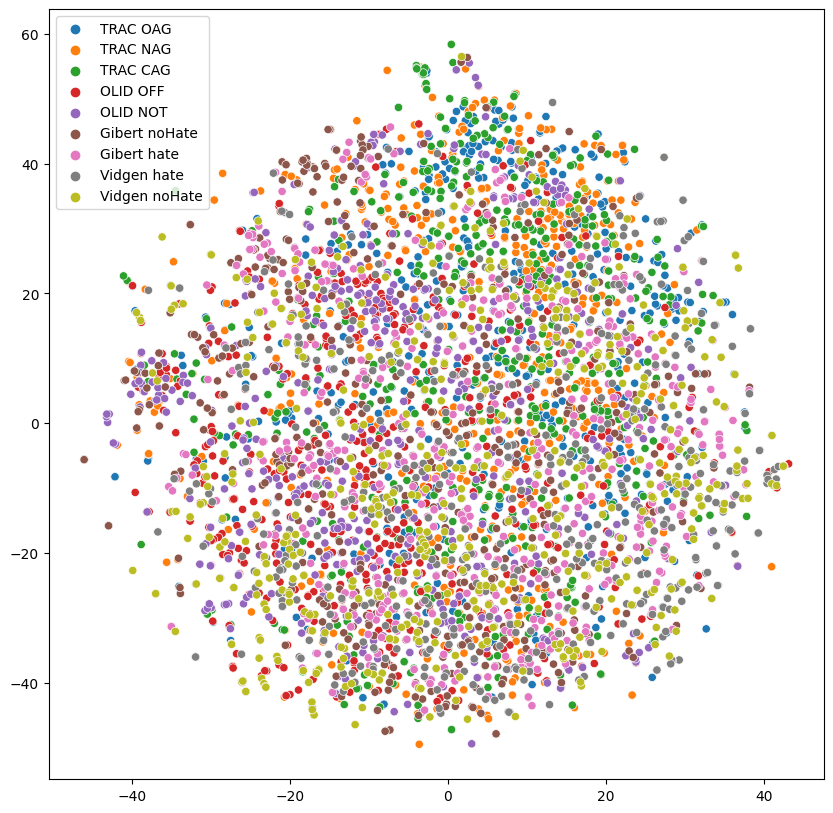

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.scatterplot(
    x=text_emb_tsne[:,0],
    y=text_emb_tsne[:,1],
    hue=y
)

In [61]:
df['Label'].unique()

array(['TRAC OAG', 'TRAC NAG', 'TRAC CAG', 'OLID OFF', 'OLID NOT',
       'Gibert noHate', 'Gibert hate', 'Vidgen hate', 'Vidgen noHate'],
      dtype=object)

<AxesSubplot:>

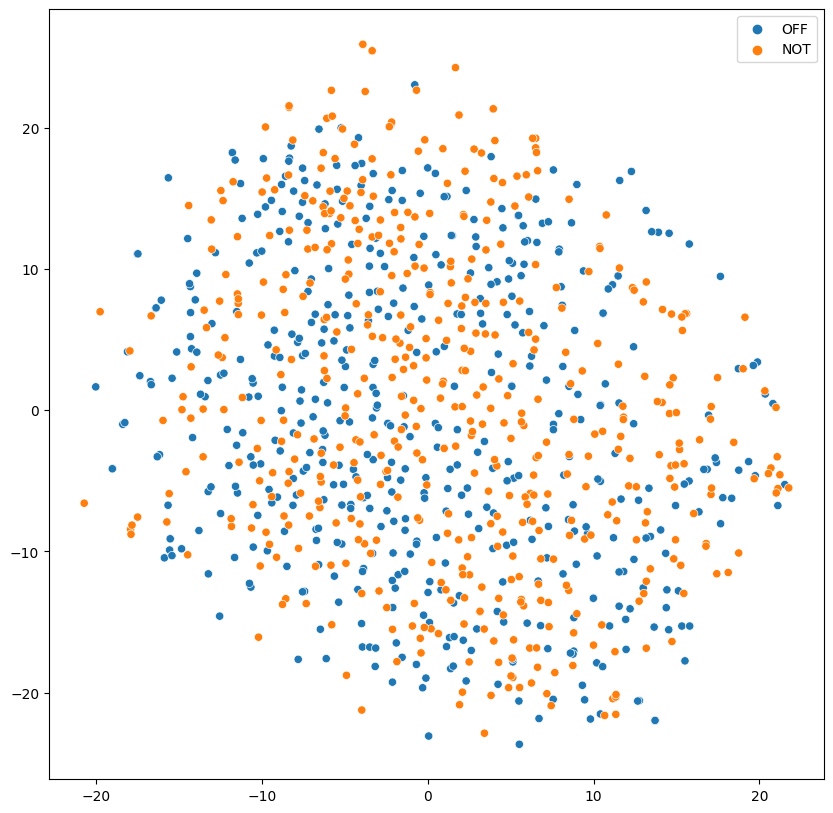

In [70]:
df['LabelNew'] = df['Label'].replace({
    'TRAC CAG': 'OFF',
    'TRAC OAG': 'OFF',
    'OLID OFF': 'OFF',
    'Gibert hate': 'OFF',
    'Vidgen hate': 'OFF',
    'TRAC NAG': 'NOT',
    'Gibert noHate': 'NOT',
    'Vidgen noHate': 'NOT',
    'OLID NOT': 'NOT'
})
 
n = 500
X = []
y = []

for c in df['LabelNew'].unique():
    xs = random.sample(list(text_emb[df['LabelNew'] == c]), n)
    ys = n * [c]
    
    X += xs
    y += ys

tsne = TSNE(n_components=2)
text_emb_tsne = tsne.fit_transform(X, y)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.scatterplot(
    x=text_emb_tsne[:,0],
    y=text_emb_tsne[:,1],
    hue=y
)

Representation model may not be rich enough to capture semantics for hate speech detection.